#  MAP 554 / TP1 -  Lab 3: Example of use of multiobjective optimization algorithms on an aerospace vehicle design test case


In [1]:
from IPython.display import Image

In [2]:
# Installation of required packages
!pip install Git+https://github.com/Project-Platypus/Platypus.git

  Cloning https://github.com/Project-Platypus/Platypus.git to /tmp/pip-req-build-359dch_i
  Created wheel for Platypus-Opt: filename=Platypus_Opt-1.0.4-py3-none-any.whl size=69161 sha256=9e601cae536c02010d0ca48185c8ca4c0894a881093db11986380a8dd6a877ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3eg86l8/wheels/7f/84/17/d0af5a0a43f9be505866d2478bcce40d48561d0eb1d036230c
Successfully built Platypus-Opt




## <font color='blue'> Problem description</font>

- <font color='blue'> Analysis </font> of a **solid propellant booster performance** using four coupled disciplines:
    - Propulsion,
    - Structure,
    - Mass estimation,
    - Performance analyses. 

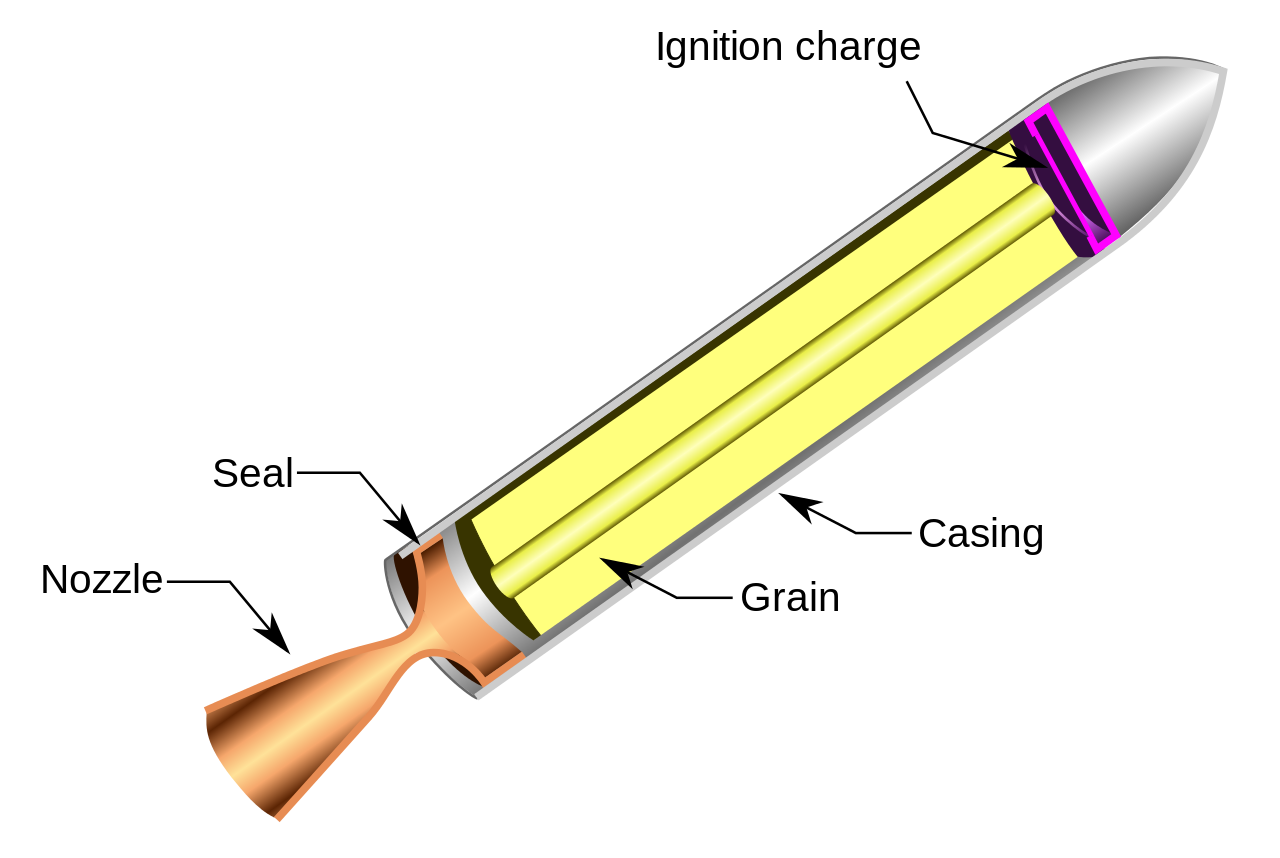

In [3]:
Image('fusee.png',width = 750)

We aim at optimizing the design of a solid propellant rocket booster for two objective :
- Maximization of the increment of velocity of the booster
- Minimization of the global mass of the booster

Four optimization variables are involved : 
- Diameter of the nozzle throat ($Dc$)
- Exit diameter of the nozzle ($Ds$)
- Combustion pressure ($Pc$)
- Mass of propellant ($M$)

The bounds of the design  variables are the following: 
  - $0.05 \leq Dc \leq  1$ (in meters)
  - $0.5 \leq  Ds \leq  1.2$ (in meters)
  - $1 \leq  Pc \leq  500$ (in bars)
  - $10000. \leq  M \leq  15000.$ (in kg)
  
We suppose that the booster has a payload of 500 kg.

Eight constraints are involved in the design optimization problem relative to the propulsion and the structural sizing: 
- Combustion pressure with respect to the ambient pressure
- Consistency of diameter ratio between the nozzle exit  diameter and the throat diameter
- Consistency of pressures between the nozzle exit pressure and the combustion pressure
- Constraint of characteristic velocity of propellant
- Consistency of the propellant filling 
- Consistency of the clamping
- Two bulk constraints on the solid booster


## Design process : 

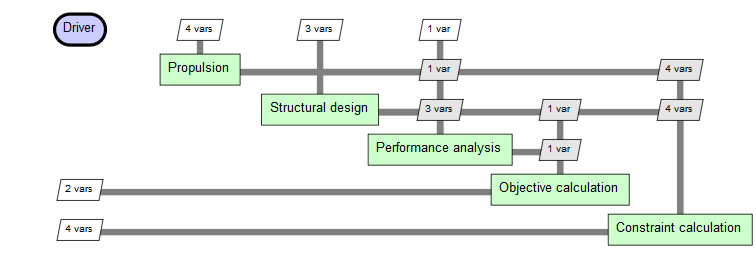

In [4]:
Image('xdsm_booster.png',width = 750)

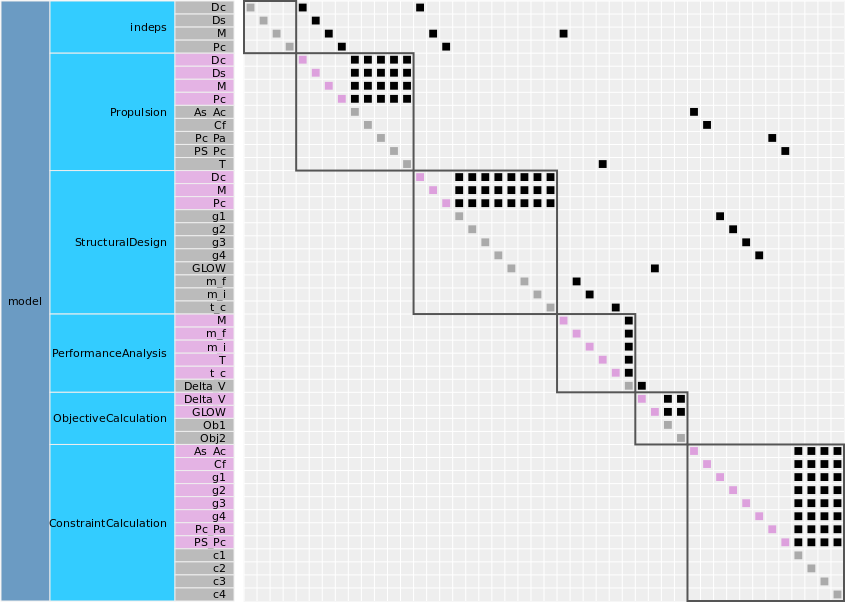

In [5]:
Image('partition_tree_n2.png',width = 750)

## <font color='blue'> Problem simulation</font>
Import of general python library 

In [6]:
import Masse, Propulsion, MDA #python functions required to run the simulations
import numpy as np
%matplotlib inline

In [7]:
# Usage : [Obj, Cons] = MDA(X)

In [8]:
MDA.Booster(np.array([1.,1.,1.,1.]))

([-3.5891803911715563, 17.57791530839737],
 array([-0.9948494 , -0.00971429, -0.69493707, -0.68322634,  0.12175233,
         1.39709532, -0.04838154,  0.01504821]))

## <font color='blue'> Multi-objective optimization with Platypus</font>

Platypus is a python library for multi-objective optimization. Platypus offer several multi-objective optimization algorithms using population-based methods.

To define an optimization problem, one has to define : 
- the number of design variables, objective functions and constraints
- the definition of variable bounds
- the problem functions (objective and constraints)

```
from platypus import Problem
problem = Problem(i,j,k) # with i : number of design variables, j : number of objective functions, k : number of constraints
    
problem.types[:] =  [Real(0., 1.)...] #Definition of constraints ans bounds
problem.constraints[:] = "<=0"  #feasible is g$\leq 0$
problem.function = my_func 
problem.directions[:]= problem.MINIMIZE
```


To run the optimization problem, one has to define the optimization algorithm and number of iterations : 
```
algorithm = NSGAII(problem,population_size=100)
algorithm.run(n_iter)
```

 conda install -c conda-forge inspyred ## <font color='blue'> Exercice
### 1. Optimize the booster test case with NSGA-II algorithm
- All the variables have been bounded between 0. and 1.
- Objectives have been normalized by a factor 1000.
- Maximization of $\Delta_V$ has been transformed into minimization of -$\Delta_V$

### 2. Plot the Pareto front using platypus analysis

Help for data analysis : https://platypus.readthedocs.io/en/latest/getting-started.html#a-simple-example

### 3. Try OMOPSO on this problem using platypus and plot the Pareto front